## Mortgage Loans: Linear Regression Example

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sqrt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv('../data/ames_housing.csv')
df.shape

(1460, 81)

In [4]:
df.head(2).T

,0,1
Id,1,2
MSSubClass,60,20
MSZoning,RL,RL
LotFrontage,65.0,80.0
LotArea,8450,9600
Street,Pave,Pave
Alley,NaN,NaN
LotShape,Reg,Reg
LandContour,Lvl,Lvl
Utilities,AllPub,AllPub


In [5]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


## Exploratory data analysis

In [6]:
# To find out our predictors... use "correlations"
corrs = df.corr()
corrs
corrs['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

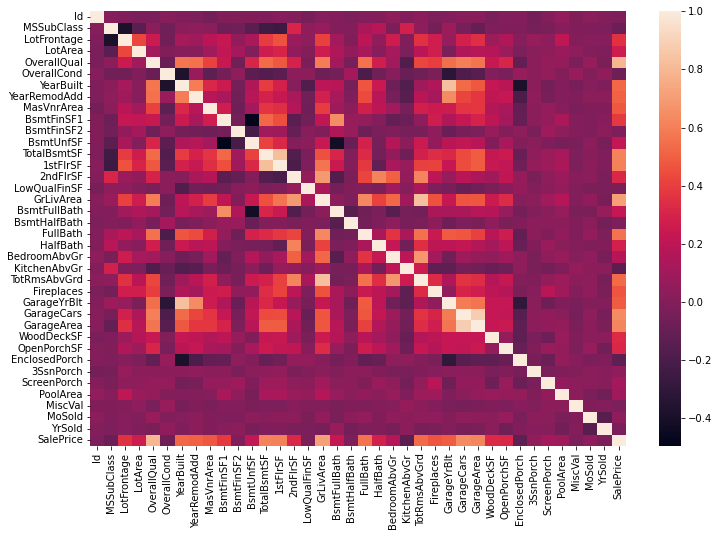

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(corrs);

In [8]:
# target
print(df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [9]:
# remove extreme outliers
print(df.shape[0])
cutpoint = df['SalePrice'].mean()+3*df['SalePrice'].std()
print(cutpoint)
df=df[df['SalePrice']<=cutpoint].copy()
print(df.shape[0])

1460
419248.70453907084
1438


In [10]:
# recoding neighborhood
print(df['Neighborhood'].value_counts().head())
df['Location']='Other'
df.loc[df['Neighborhood']=='NAmes', 'Location']='NAmes'
df.loc[df['Neighborhood']=='CollgCr', 'Location']='CollgCr'
df.loc[df['Neighborhood']=='OldTown', 'Location']='OldTown'
df.loc[df['Neighborhood']=='Somerst', 'Location']='Somerst'
df['Location'].value_counts()

NAmes      225
CollgCr    149
OldTown    112
Edwards    100
Somerst     85
Name: Neighborhood, dtype: int64


Other      867
NAmes      225
CollgCr    149
OldTown    112
Somerst     85
Name: Location, dtype: int64

In [11]:
# make neighborhood binary for simplicity
df['LargeNeighborhood']=np.where(df['Location']=='Other', 0,1)
df[['LargeNeighborhood', 'Location']].head()

,LargeNeighborhood,Location
0,1,CollgCr
1,0,Other
2,1,CollgCr
3,0,Other
4,0,Other


In [12]:
# recoding building type
print(df['BldgType'].value_counts())
df['SingleFam']=np.where(df['BldgType']=='1Fam',1,0)
print(df['SingleFam'].value_counts())

1Fam      1198
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
1    1198
0     240
Name: SingleFam, dtype: int64


In [13]:
df[['SingleFam','BldgType']].head(10)

,SingleFam,BldgType
0,1,1Fam
1,1,1Fam
2,1,1Fam
3,1,1Fam
4,1,1Fam
5,1,1Fam
6,1,1Fam
7,1,1Fam
8,1,1Fam
9,0,2fmCon


In [14]:
# recoding total square feet
df['TotalSF'] = df['TotalBsmtSF']+df['1stFlrSF']+df['2ndFlrSF']
df['TotalSF'].describe()

count     1438.000000
mean      2532.068150
std        769.994523
min        334.000000
25%       2004.250000
50%       2460.000000
75%       2982.500000
max      11752.000000
Name: TotalSF, dtype: float64

In [15]:
# bedrooms
df['BedroomAbvGr'].describe()

count    1438.000000
mean        2.863004
std         0.811372
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64

In [16]:
# recoding bathrooms
df['Bathrooms']=df['FullBath']+df['HalfBath']
df['Bathrooms'].describe()

count    1438.000000
mean        1.929068
std         0.781112
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: Bathrooms, dtype: float64

In [17]:
# year
df['YearBuilt'].describe()

count    1438.000000
mean     1970.844924
std        30.093041
min      1872.000000
25%      1953.250000
50%      1972.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

<AxesSubplot:ylabel='Frequency'>

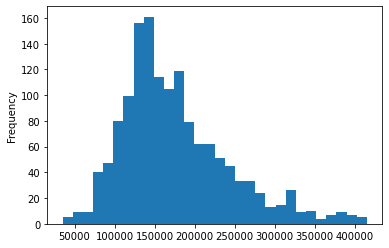

In [18]:
target_name = "SalePrice"
ames_housing = df.copy()
data, target = ames_housing.drop(columns=target_name), ames_housing[target_name]

import plotly.graph_objects as go
import numpy as np
target.plot(kind='hist', bins=30)

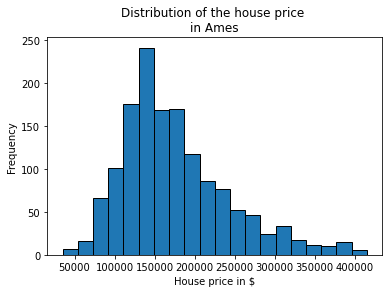

In [19]:
#### From here referred to https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_ames_housing.html

import matplotlib.pyplot as plt
target.plot.hist(bins=20, edgecolor="black")
plt.xlabel("House price in $")
_ = plt.title("Distribution of the house price \nin Ames")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1438 entries, 0 to 1459
Data columns (total 86 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1438 non-null   int64  
 1   MSSubClass         1438 non-null   int64  
 2   MSZoning           1438 non-null   object 
 3   LotFrontage        1181 non-null   float64
 4   LotArea            1438 non-null   int64  
 5   Street             1438 non-null   object 
 6   Alley              91 non-null     object 
 7   LotShape           1438 non-null   object 
 8   LandContour        1438 non-null   object 
 9   Utilities          1438 non-null   object 
 10  LotConfig          1438 non-null   object 
 11  LandSlope          1438 non-null   object 
 12  Neighborhood       1438 non-null   object 
 13  Condition1         1438 non-null   object 
 14  Condition2         1438 non-null   object 
 15  BldgType           1438 non-null   object 
 16  HouseStyle         1438 

In [21]:
numerical_data = df.select_dtypes("number")
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1438 entries, 0 to 1459
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1438 non-null   int64  
 1   MSSubClass         1438 non-null   int64  
 2   LotFrontage        1181 non-null   float64
 3   LotArea            1438 non-null   int64  
 4   OverallQual        1438 non-null   int64  
 5   OverallCond        1438 non-null   int64  
 6   YearBuilt          1438 non-null   int64  
 7   YearRemodAdd       1438 non-null   int64  
 8   MasVnrArea         1431 non-null   float64
 9   BsmtFinSF1         1438 non-null   int64  
 10  BsmtFinSF2         1438 non-null   int64  
 11  BsmtUnfSF          1438 non-null   int64  
 12  TotalBsmtSF        1438 non-null   int64  
 13  1stFlrSF           1438 non-null   int64  
 14  2ndFlrSF           1438 non-null   int64  
 15  LowQualFinSF       1438 non-null   int64  
 16  GrLivArea          1438 

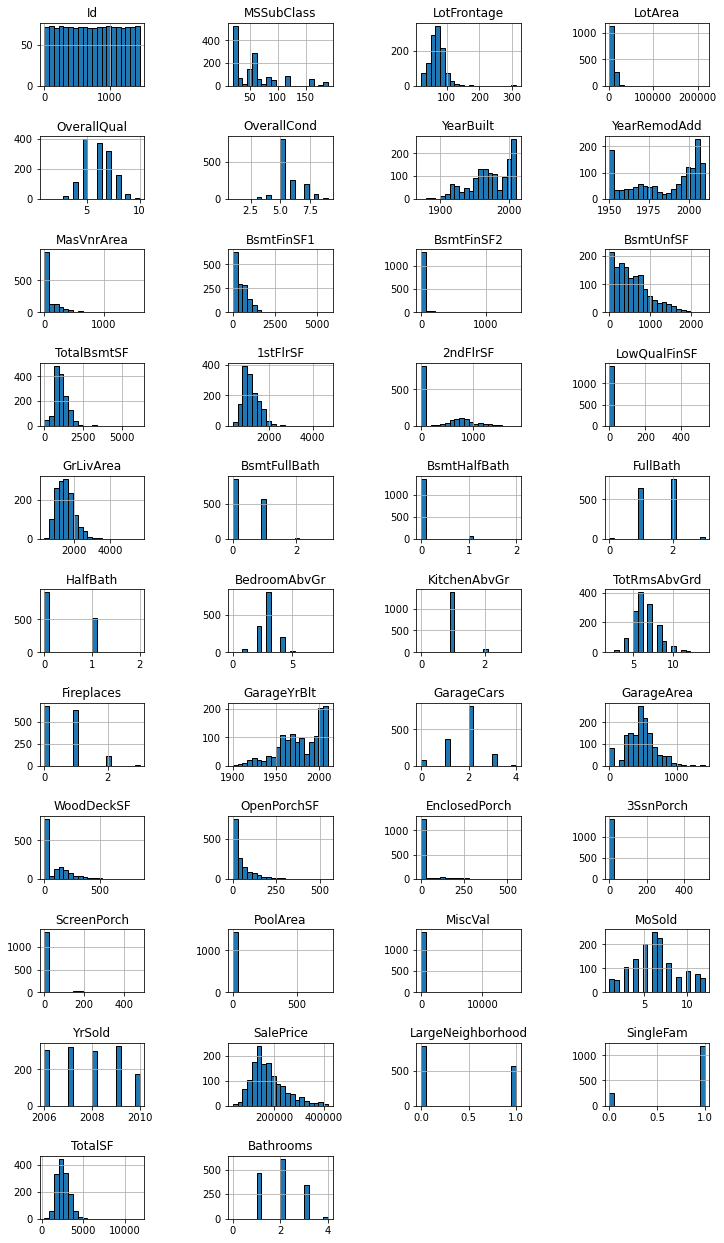

In [22]:
numerical_data.hist(bins=20, figsize=(12, 22), edgecolor="black",
                    layout=(11, 4))
plt.subplots_adjust(hspace=0.8, wspace=0.8)

In [23]:
string_data = data.select_dtypes(object)
string_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1438 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1438 non-null   object
 1   Street         1438 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1438 non-null   object
 4   LandContour    1438 non-null   object
 5   Utilities      1438 non-null   object
 6   LotConfig      1438 non-null   object
 7   LandSlope      1438 non-null   object
 8   Neighborhood   1438 non-null   object
 9   Condition1     1438 non-null   object
 10  Condition2     1438 non-null   object
 11  BldgType       1438 non-null   object
 12  HouseStyle     1438 non-null   object
 13  RoofStyle      1438 non-null   object
 14  RoofMatl       1438 non-null   object
 15  Exterior1st    1438 non-null   object
 16  Exterior2nd    1438 non-null   object
 17  MasVnrType     1431 non-null   object
 18  ExterQual      1438 non-null

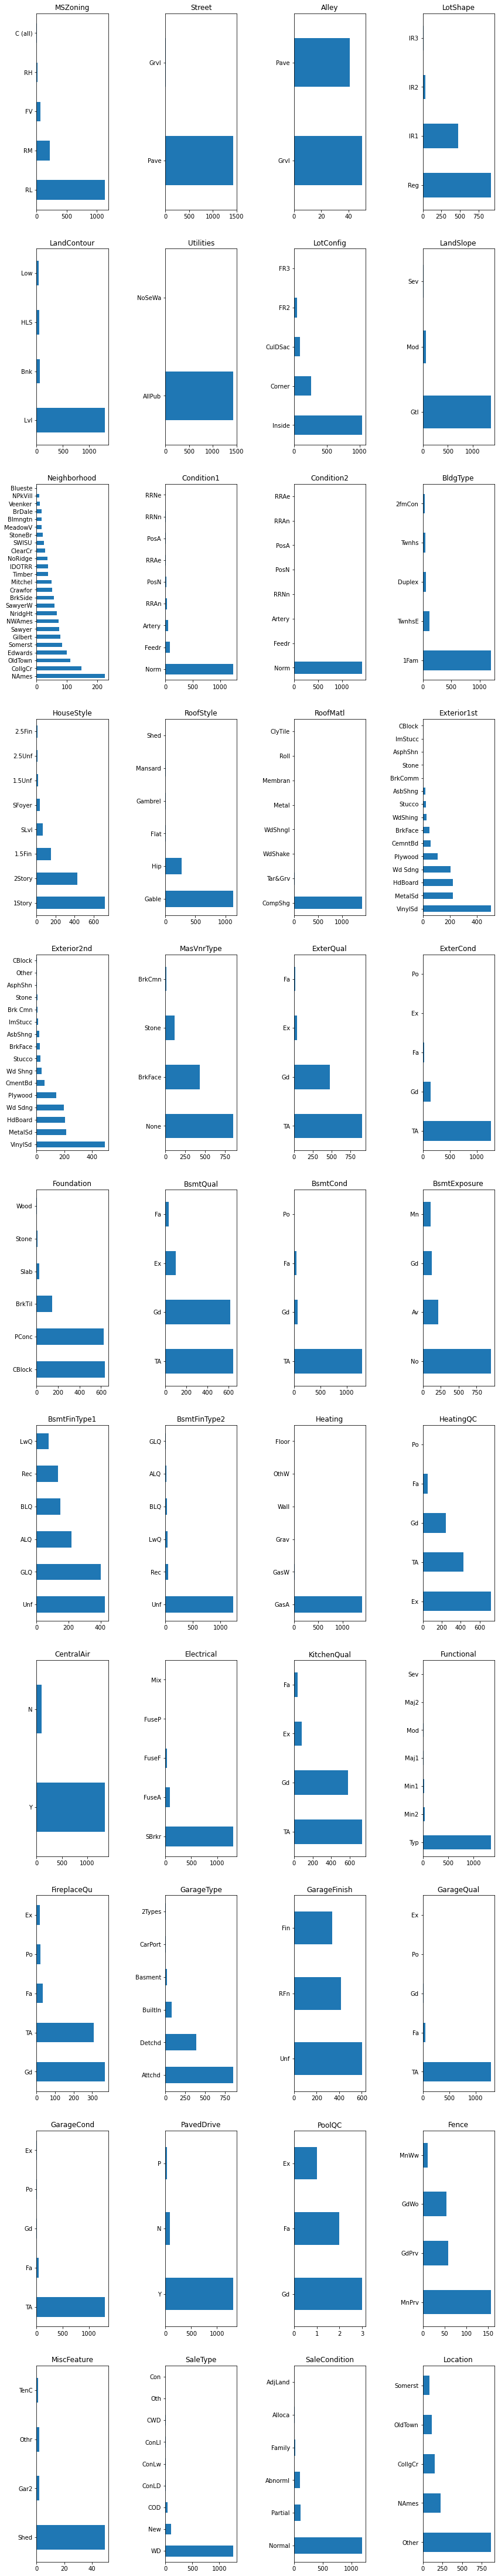

In [24]:
from math import ceil
from itertools import zip_longest

n_string_features = string_data.shape[1]
nrows, ncols = ceil(n_string_features / 4), 4

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(14, 80))

for feature_name, ax in zip_longest(string_data, axs.ravel()):
    if feature_name is None:
        # do not show the axis
        ax.axis("off")
        continue

    string_data[feature_name].value_counts().plot.barh(ax=ax)
    ax.set_title(feature_name)

plt.subplots_adjust(hspace=0.2, wspace=0.8)

In [25]:
df['RecentYearModAdd'] = 2020 - df['YearRemodAdd']
df['RecentYearModAdd'].head()

0    17
1    44
2    18
3    50
4    20
Name: RecentYearModAdd, dtype: int64

In [26]:
# To find out our predictors... use "correlations"
corrs = df.corr()
corrs
corrs['SalePrice'].sort_values()

RecentYearModAdd    -0.536864
KitchenAbvGr        -0.145244
EnclosedPorch       -0.140363
LargeNeighborhood   -0.112675
MSSubClass          -0.082756
OverallCond         -0.069833
LowQualFinSF        -0.060149
Id                  -0.028112
BsmtHalfBath        -0.026684
YrSold              -0.019633
MiscVal             -0.018489
BsmtFinSF2          -0.004591
PoolArea             0.036829
3SsnPorch            0.061720
MoSold               0.081094
ScreenPorch          0.092677
SingleFam            0.129659
BedroomAbvGr         0.172871
BsmtUnfSF            0.216787
BsmtFullBath         0.231469
LotArea              0.253476
HalfBath             0.276652
2ndFlrSF             0.287319
OpenPorchSF          0.313403
WoodDeckSF           0.330921
BsmtFinSF1           0.341000
LotFrontage          0.342167
MasVnrArea           0.420717
Fireplaces           0.465635
TotRmsAbvGrd         0.487621
GarageYrBlt          0.506608
YearRemodAdd         0.536864
FullBath             0.553524
YearBuilt 

In [27]:
# confirm no missing data
df[['SalePrice','YearBuilt','Bathrooms','BedroomAbvGr','TotalSF','SingleFam','LargeNeighborhood','GarageCars','RecentYearModAdd']].isnull().sum()

SalePrice            0
YearBuilt            0
Bathrooms            0
BedroomAbvGr         0
TotalSF              0
SingleFam            0
LargeNeighborhood    0
GarageCars           0
RecentYearModAdd     0
dtype: int64

In [28]:
# confirm all numerical
df[['SalePrice','YearBuilt','Bathrooms','BedroomAbvGr','TotalSF','SingleFam','LargeNeighborhood','GarageCars','RecentYearModAdd']].dtypes

SalePrice            int64
YearBuilt            int64
Bathrooms            int64
BedroomAbvGr         int64
TotalSF              int64
SingleFam            int64
LargeNeighborhood    int64
GarageCars           int64
RecentYearModAdd     int64
dtype: object

## Model Building

In [29]:
# declare features and target
features = ['YearBuilt','Bathrooms','BedroomAbvGr','TotalSF','SingleFam','LargeNeighborhood','GarageCars','RecentYearModAdd']
y = df['SalePrice']
X = df[features]
print(y.shape, X.shape)

(1438,) (1438, 8)


In [30]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=12)

In [31]:
# Fit the model to the training dataset
mymodel = LinearRegression()
mymodel.fit(X_train, y_train)

LinearRegression()

In [32]:
# coefficients and intercept
mymodel.intercept_
mymodel.coef_

array([  354.03969765,  8084.21204302, -4936.62067323,    42.32955865,
       22095.54171199, -7951.5585255 , 19530.14133929,  -506.76577487])

In [49]:
coefs=list(mymodel.coef_)
coefs

[354.03969764658325,
 8084.2120430229725,
 -4936.620673227852,
 42.32955865214519,
 22095.541711994527,
 -7951.558525500829,
 19530.141339290873,
 -506.76577487032813]

In [33]:
# what is the equation for this model?
cols=list(X.columns)
coefs=list(mymodel.coef_)
xcoefs = [(coefs[i], cols[i]) for i in range(0, len(cols))]
equation = f'y = {round(mymodel.intercept_,4)} + {round(xcoefs[0][0],4)}*{xcoefs[0][1]} + {round(xcoefs[1][0],4)}*{xcoefs[1][1]} + {round(xcoefs[2][0],4)}*{xcoefs[2][1]} + {round(xcoefs[3][0],4)}*{xcoefs[3][1]}+ {round(xcoefs[4][0],4)}*{xcoefs[4][1]}+ {round(xcoefs[5][0],4)}*{xcoefs[5][1]} + {round(xcoefs[6][0],4)}*{xcoefs[6][1]} + {round(xcoefs[7][0],4)}*{xcoefs[7][1]} '
print("Regression Equation: ", equation)

Regression Equation:  y = -662787.386 + 354.0397*YearBuilt + 8084.212*Bathrooms + -4936.6207*BedroomAbvGr + 42.3296*TotalSF+ 22095.5417*SingleFam+ -7951.5585*LargeNeighborhood + 19530.1413*GarageCars + -506.7658*RecentYearModAdd 


In [34]:
# Predict the y-values on the testing dataset & examine the first few
y_preds = [int(x) for x in mymodel.predict(X_test)]
print(list(y_test[:5]))
print(y_preds[:5])

[132000, 160000, 149700, 82000, 233170]
[135597, 105018, 160245, 51479, 232576]


## Model Evaluation

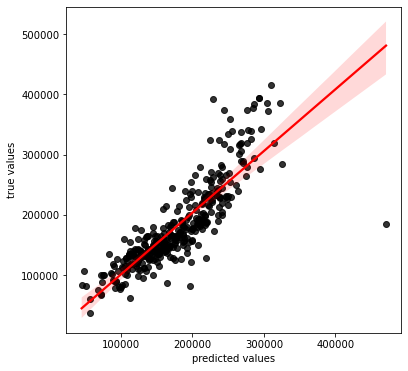

In [35]:
# compare predictions to known values
plt.figure(figsize=(6,6))
ax = sns.regplot(x = y_preds, 
                 y = y_test, 
                 scatter_kws={"color": "black"}, 
                 line_kws={"color": "red"})
ax.set(xlabel='predicted values', ylabel='true values');

In [36]:
# R-2 (coefficient of determination)
r2 = metrics.r2_score(y_test, y_preds)
round(r2, 2)

0.72

In [37]:
# root mean sq error
rmse = sqrt(metrics.mean_squared_error(y_test, y_preds))
rmse

37202.83505075774

In [38]:
# is that more or less than if we just used the average as our model?
avg_val = y_train.mean()
comparison = np.full((len(y_test), ), avg_val)
baseline=sqrt(metrics.mean_squared_error(y_test, comparison))
print(round(baseline,2))
print(round(rmse,2))
print('improvement:',round(rmse-baseline,2))

71241.69
37202.84
improvement: -34038.85


## Make new predictions

In [39]:
# remember the linear regression equation?
print(equation)

y = -662787.386 + 354.0397*YearBuilt + 8084.212*Bathrooms + -4936.6207*BedroomAbvGr + 42.3296*TotalSF+ 22095.5417*SingleFam+ -7951.5585*LargeNeighborhood + 19530.1413*GarageCars + -506.7658*RecentYearModAdd 


In [40]:
# make some fake data
fake1= [[2010, 2, 3, 2000, 1,0,2,5]] # modest SF home
fake2= [[2015, 3, 5, 4000, 1,1,1,11]] # large SF home in big neighborhood
fake3= [[1980, 1, 2, 1000, 0,0,3,19]] # small home, not SF, outside big neighborhood

In [41]:
# make predictions just using our equation:
for data in [fake1, fake2, fake3]:
    YearBuilt=data[0][0]
    Bathrooms=data[0][1]
    BedroomAbvGr=data[0][2]
    TotalSF=data[0][3]
    SingleFam=data[0][4]
    LargeNeighborhood=data[0][5]
    GarageCars=data[0][6]
    RecentYearModAdd=data[0][7]
    y = -662787.386 + 354.0397*YearBuilt + 8084.212*Bathrooms + -4936.6207*BedroomAbvGr + 42.3296*TotalSF+ 22095.5417*SingleFam+ -7951.5585*LargeNeighborhood + 19530.1413*GarageCars + -506.7658*RecentYearModAdd 
    print('$',int(y))

$ 193472
$ 247590
$ 127713


In [42]:
# pickle your model
import pickle
filename = open('ames_housing_lr_model_cahn.pkl', 'wb')
pickle.dump(mymodel, filename)
filename.close()

In [43]:
## read in our pickle file
filename = open('ames_housing_lr_model_cahn.pkl', 'rb')
unpickled_model = pickle.load(filename)
filename.close()

In [44]:
# make predictions
for data in [fake1, fake2, fake3]:
    print('$',int(unpickled_model.predict(data)))

$ 193472
$ 247590
$ 127713


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Turn that into a function

In [45]:
def ames_lr_function(YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,SingleFam,LargeNeighborhood,GarageCars,RecentYearModAdd):
    checksum=0
    for var in [YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,SingleFam,LargeNeighborhood]:
        if isinstance(var,int)==False:
            checksum+=1
    if (YearBuilt<1900)|(YearBuilt>2020):
        checksum+=1
    if (Bathrooms<1) | (Bathrooms>5):
        checksum+=1
    if (BedroomAbvGr<1) | (BedroomAbvGr>5):
        checksum+=1
    if (TotalSF<100)|(TotalSF>5000):
        checksum+=1
    if (SingleFam!=0) & (SingleFam!=1):
        checksum+=1
    if (LargeNeighborhood!=0) & (LargeNeighborhood!=1):
        checksum+=1
    if checksum>0:
        return "Please provide adequate inputs"
    else:
        y = [-662787.386 + 354.0397*YearBuilt + 8084.212*Bathrooms + -4936.6207*BedroomAbvGr + 42.3296*TotalSF+ 22095.5417*SingleFam+ -7951.5585*LargeNeighborhood + 19530.1413*GarageCars + -506.7658*RecentYearModAdd]
#         y = unpickled_model.predict([[YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,SingleFam,LargeNeighborhood]])
        formatted_y = "${:,.2f}".format(y[0])
        return formatted_y 

In [46]:
# test the function
YearBuilt=1980
Bathrooms=2
BedroomAbvGr=3
TotalSF=2000
SingleFam=0
LargeNeighborhood=0
GarageCars=2
RecentYearModAdd=1
ames_lr_function(YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,SingleFam,LargeNeighborhood,GarageCars,RecentYearModAdd)

'$162,782.50'

In [47]:
df['GarageCars'].value_counts()

2    823
1    369
3    160
0     81
4      5
Name: GarageCars, dtype: int64

<AxesSubplot:ylabel='Frequency'>

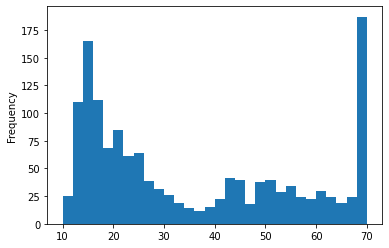

In [48]:
df['RecentYearModAdd'].value_counts()
df['RecentYearModAdd'].plot(kind='hist', bins=30)